# Equações diferenciais com atrasos
Muito fenômenos naturais apresentam atrasos na relação entre causa e efeito. Se formos estritos preceberemos que poucas relações de causa e efeito em biologia podem ser consideradas instantâneas, Por exemplo: um predador leva tempo para digerir sua presa e convertê-la em novos predadores. Sob esta ótica, os modelos baseados em EDOs que vimos até agora, são meras aproximações às dinâmicas reais. 

Técnicamente falando, os modelos EDO, partem do princípio que apena o conhecimento do presente e sua derivada é suficiente para determinar o estado imediatamente futuro do sistema. Equações diferencias com atrasos, incluem a dependência de outros pontos na história do sistema para a determinação dos estados futuros. Desta maneira os sistema pode ser escrito da seguinte forma:
$$\frac{dx}{dt} = F(t, x(t), x(t-\tau))$$

onde $\tau$ é a variável de atraso.

## Equação Logística com atraso discreto
Como nosso primeiro exemplo. vamos examinar a equação de Hutchinson (1948):
$$\frac{dx(t)}{dt}=r x(t)\left[1-\frac{x(t-\tau)}{K}\right]$$

Modelos com atraso são usados muito menos frequentemente, devido à dificuldade na sua solução analítica. Felizmente dispomos de uma [biblioteca](https://github.com/Zulko/ddeint) em Python para sua solução numérica.

In [1]:
%display typeset

In [4]:
from ddeint import ddeint
import numpy as np

Wright demonstrou em 1955, que se $r\tau<\frac{37}{24}$ e $x(0)>0$, $x(t) \rightarrow K$ quando $t\rightarrow \infty$. Mas se $r\tau > \frac{pi}{2}$, então a equação logística com atraso, apresenta uma solução periódica (ciclo limite), que oscila em torno de K.

In [29]:
def logdelay(y,t,*pars):
    x=y(t)
    r,K,tau = pars
    xd = y(t-tau)
    return np.array([
        r*x*(1-(xd/K))
    ])
g = lambda t: 1 # valores de x(t<0)
tsteps = np.linspace(0,50,1000)
r = pi/2
K = 1000
tau = 1
res=ddeint(logdelay,g, tsteps, (r,K,tau))

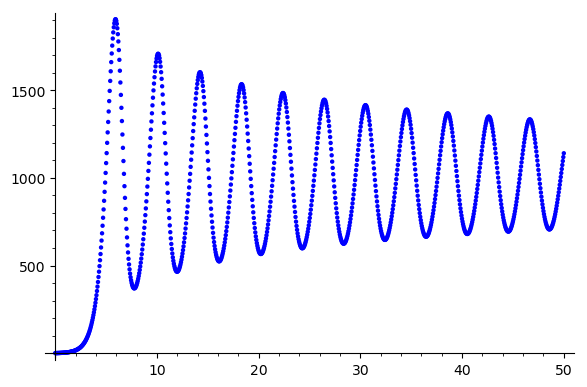

In [30]:
list_plot(list(zip(tsteps,np.array(res))))